# **ETL for Globel housing Market Data Set**

## Objectives

Understandung the Europien Housing Matked from 2015 to 2024
View the csv-file from Kaggle 
Clean it
Focus only on European Countrys for better comparability and intrest

## Inputs

in the Folder Data/raw/global_housing_market_extended.csv drom the years 2015-2024

## Outputs

I will generate a europe_housing_market.csv because my focus is only the europe housing market. I will place it in Data/processed/

## Additional Comments

Aim: Looking at Europe housing market to determan if and when it was a better time to buy a living space

Buissness Requirements: Are there possible factors thad aid the housing markets affordability and you use these markers to see if you should by now or wait.

Hypothesis: It is better to buy a house in Crisis/Corona Times.

I assuming the european housing market is more ar less independent from the global market. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\abcde\\Documents\\VS Code Projects\\Europa-Housing-Market\\data_anaylsis_global_housing_market\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\abcde\\Documents\\VS Code Projects\\Europa-Housing-Market\\data_anaylsis_global_housing_market'

# Section 1 - Extraction

Import all nessessary libarys

Loading the .csv file from the Data/raw folder in into a pandas dataframe

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("Data/raw/global_housing_market_extended.csv")

---

# Section 2 - Transformation

Imspect the generall shape of the data

In [37]:
df.shape

(200, 11)

So we have 11 categories (colums) and 200 rows
we know the data is from 2015-2024 (10 Years)
witch means we got 20 Countrys. (200 / 10 = 20)

Lets see whitch ones:
1. therefore we need the name of the colum 
2. print all the unique values in it

In [38]:
df.head(1)

,Country,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
0,USA,2015,117.454012,116.550001,9.587945,4.493292,1.514121,-0.752044,-0.796707,85.985284,118.089201


In [39]:
df["Country"].unique()


array(['USA', 'Canada', 'UK', 'Germany', 'France', 'Italy', 'Spain',
       'Australia', 'India', 'China', 'Japan', 'Brazil', 'South Korea',
       'Mexico', 'South Africa', 'Russia', 'Netherlands', 'Sweden',
       'Switzerland', 'UAE'], dtype=object)

I am only intrested in the European Countrys, so I will filter the non European Countrys out. I will use .copy() to avoid changes to the original data frame. I also have to set a new index. 

In [40]:
european_countries = ['UK', 'Germany', 'France', 'Italy', 'Spain',
                       'Netherlands', 'Sweden', 'Switzerland']

In [77]:
# Add a space after or (or at the start of the next string) otherwise it gives an 
# syntax error

df_europe = df.query(
    "Country == 'UK' or Country == 'Germany' or Country == 'France' or " 
    "Country == 'Italy' or Country == 'Spain' or "
    "Country == 'Netherlands' or Country == 'Sweden' or Country == 'Switzerland'"
).copy().reset_index(drop=True)    

In [73]:
# also possible to choose it from the list

df_europe = df.query("Country in @european_countries").copy()

Checking for missing values 

In [43]:
df_europe.isnull().sum()

Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64

No missing values so no handling of them nessessary

Looking at the generell data discription:

In [44]:
df_europe.describe()

,Year,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,2019.500000,135.096650,81.951944,7.372344,4.140649,3.748487,2.267197,0.750687,76.284496,108.888005
std,2.890403,30.113909,21.103101,2.610658,1.431151,1.816557,2.399475,0.976172,8.608194,24.767316
min,2015.000000,84.341253,50.354311,3.097539,1.537814,0.667777,-1.883643,-0.960262,60.172760,71.151479
25%,2017.000000,107.590335,59.742106,4.983839,3.159588,2.157388,0.208080,-0.137664,69.679703,85.437888
50%,2019.500000,135.382826,80.199599,7.610122,4.235876,3.961111,2.470141,0.792585,77.020310,109.973317
75%,2022.000000,162.337733,100.604665,9.347214,5.399702,5.003581,4.369581,1.574326,84.094190,131.090509
max,2024.000000,179.971767,119.764579,11.562630,6.452526,6.910370,5.953115,2.497948,89.788944,149.372641


The years should be converted to Datetime. I use .dt.to_periode the show its a yearsperiode and not a single day (idea provided by ChatGPT)

In [78]:
df_europe["Year"] = (pd.to_datetime(df_europe["Year"].astype(str), format="%Y")
                                    .dt.to_period("Y"))
df_europe["Year"].head(5)   

0    2015
1    2016
2    2017
3    2018
4    2019
Name: Year, dtype: period[A-DEC]

In [85]:
df_europe["Country"] = df_europe["Country"].astype(object)
df_europe["Country"].dtype

dtype('O')

In [81]:
df_europe.columns.to_list()

['Country',
 'Year',
 'House Price Index',
 'Rent Index',
 'Affordability Ratio',
 'Mortgage Rate (%)',
 'Inflation Rate (%)',
 'GDP Growth (%)',
 'Population Growth (%)',
 'Urbanization Rate (%)',
 'Construction Index']

Load into a csv and let post it into Data/Processed



In [105]:
df_europe.to_csv("data/processed/europe_housing_market.csv")

## Understaning the other colums
Discrption provided by ChatGPT and the Dataset discription in Kaggle

1. 'House Price Index'($):
- House Price ($)	The average price of houses in USD 💰
- Index of residential property prices (base = 100 in a chosen year)
- Tracks %-change in sale prices over time (hedonic/repeat-sales methods)
- Higher = pricier homes.


2. 'Rent Index'($)
- The median monthly rent for properties in USD 🏠
- Index of market rents (base = 100). Tracks %-change in asking/contract rents. 
- Higher = more expensive renting.


3. 'Affordability Ratio'
- Measure of housing affordability. Common forms:
– Price-to-Income = median house price / median annual household income.
– Payment-to-Income = monthly mortgage payment / monthly income.
- Higher = less affordable.


4. 'Mortgage Rate (%)'
- The average mortgage interest rate percentage 📉
- Average nominal annual interest rate on new home loans (often fixed-rate offers). - Higher = costlier financing.


5. 'Inflation Rate (%)'
- Year-over-year change in CPI (consumer prices). 
- Higher = faster general price increases.


6. 'GDP Growth (%)'
- The annual GDP growth percentage 📈
- Real (inflation-adjusted) year-over-year growth of gross domestic product
- Higher = stronger economy.

7. 'Population Growth (%)'
- The percentage increase in population over the year 👥
- Annual growth rate of resident population.
- Higher = more demand pressure (often supports prices/rents).

8. 'Urbanization Rate (%)'
- percentage of the population living in urban areas 🏙️
- Share of population living in urban areas (level, not a growth rate). 
- Higher = more urban concentration.

9. 'Construction Index'
- Index of construction activity/output (base = 100). 
- Captures building volume or permits.
- Higher = more supply in pipeline.

Missing categoriy which was mentioned in Kaggle:
- Unemployment Rate (%)	The percentage of unemployed individuals in the labor force 💼
- But I dont see the need for thad metric anywayns

Lets see if we can find anything thad correlates with each other

In [87]:
df_europe.corr(numeric_only=True).round(2)

,House Price Index,Rent Index,Affordability Ratio,Mortgage Rate (%),Inflation Rate (%),GDP Growth (%),Population Growth (%),Urbanization Rate (%),Construction Index
House Price Index,1.00,0.03,0.02,-0.01,0.05,0.05,-0.04,0.22,-0.25
Rent Index,0.03,1.00,0.04,0.01,-0.04,0.05,-0.11,0.00,0.04
Affordability Ratio,0.02,0.04,1.00,0.18,0.05,-0.09,0.04,-0.22,0.04
Mortgage Rate (%),-0.01,0.01,0.18,1.00,0.06,0.27,0.01,-0.07,-0.10
Inflation Rate (%),0.05,-0.04,0.05,0.06,1.00,0.12,-0.00,-0.02,0.12
GDP Growth (%),0.05,0.05,-0.09,0.27,0.12,1.00,-0.04,-0.16,-0.17
Population Growth (%),-0.04,-0.11,0.04,0.01,-0.00,-0.04,1.00,-0.00,0.18
Urbanization Rate (%),0.22,0.00,-0.22,-0.07,-0.02,-0.16,-0.00,1.00,0.01
Construction Index,-0.25,0.04,0.04,-0.10,0.12,-0.17,0.18,0.01,1.00


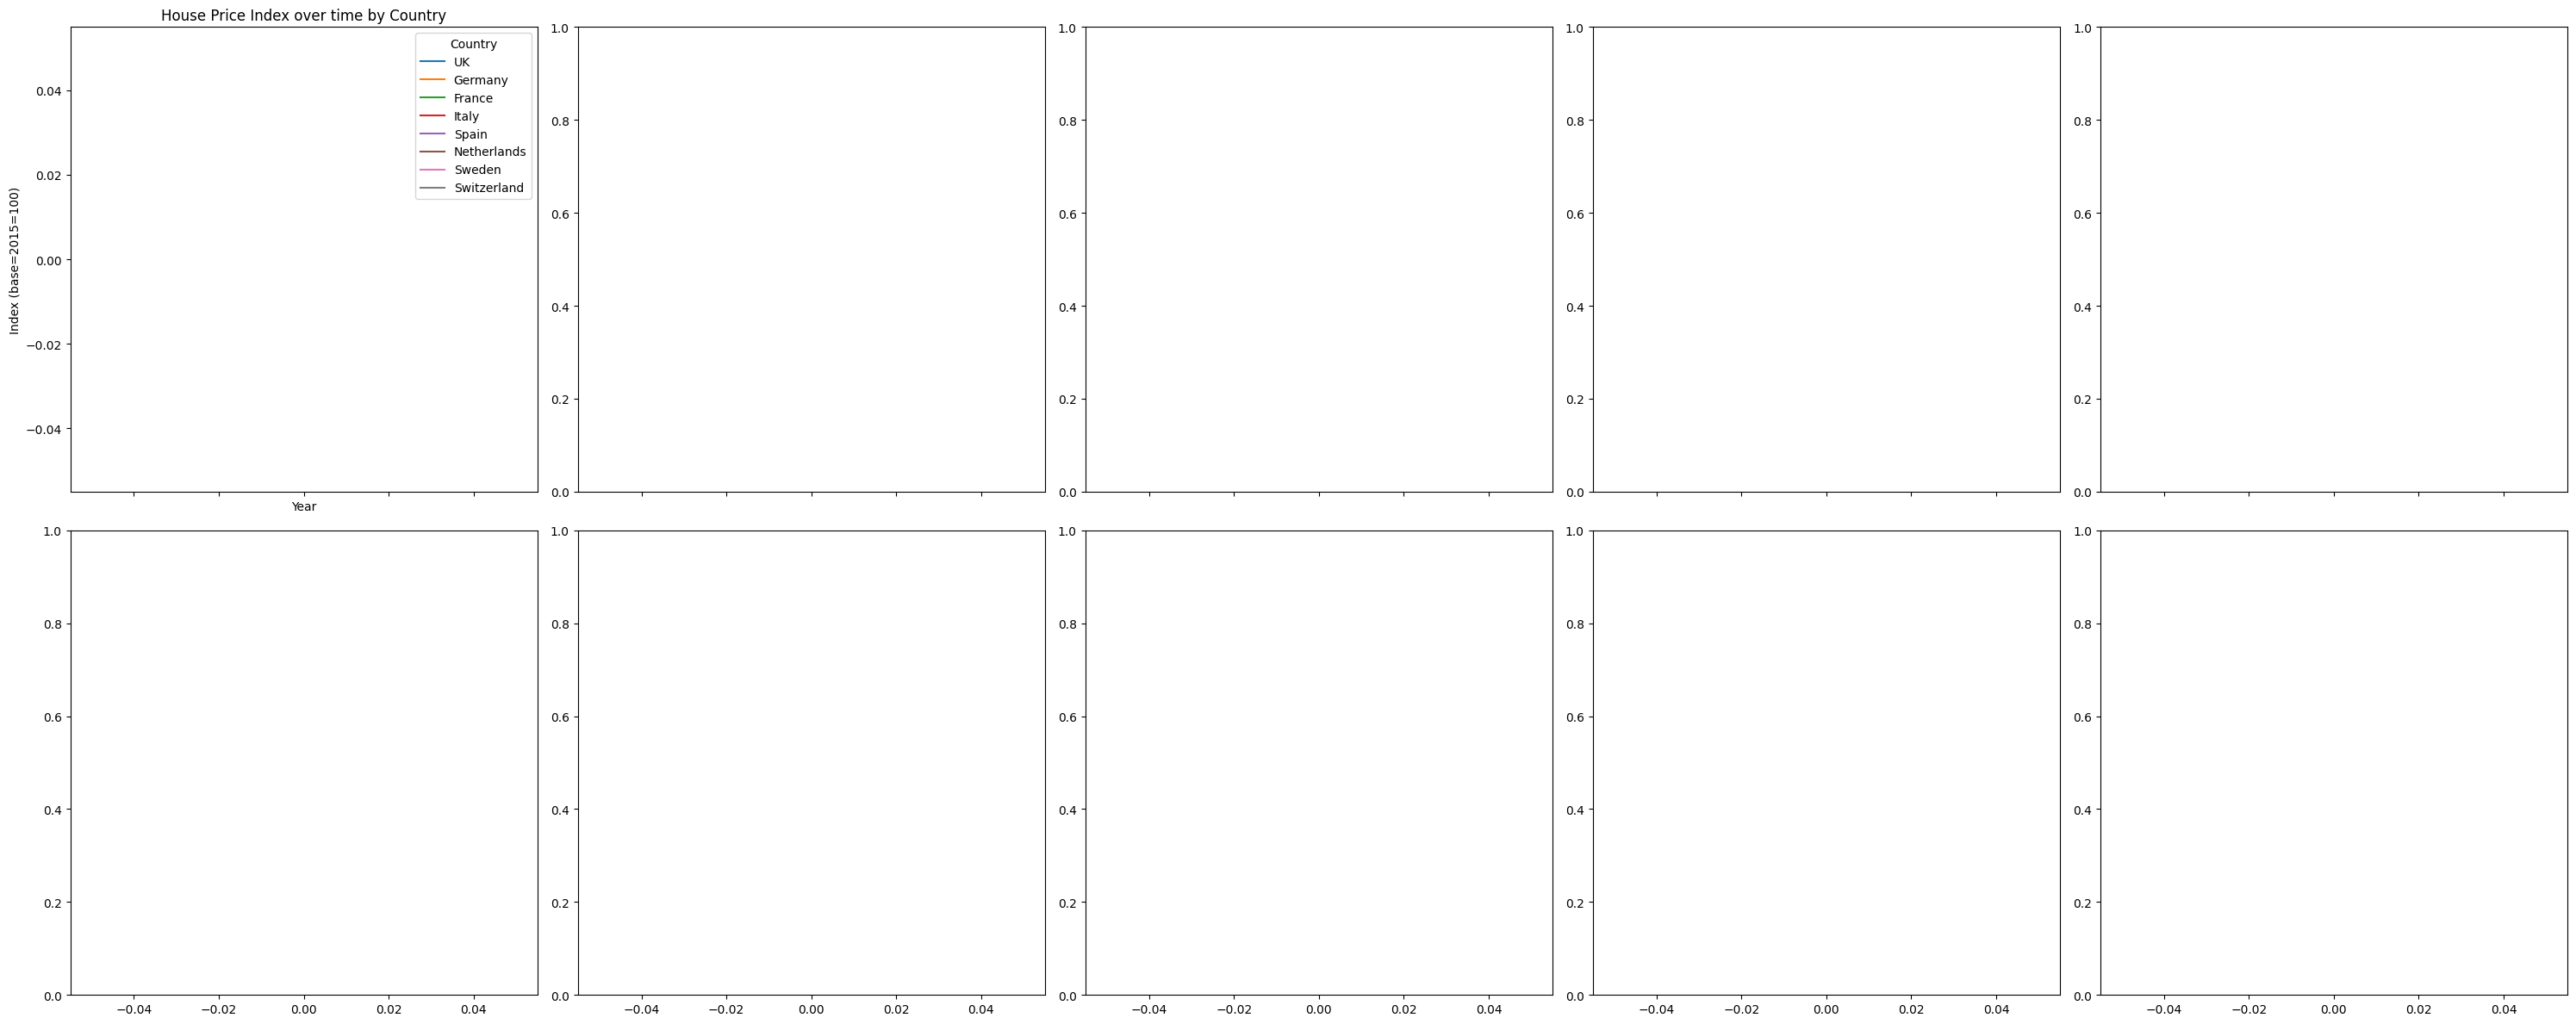

In [110]:
# sicherstellen: Jahr numerisch
df_europe = df_europe.copy()
df_europe["Year"] = pd.to_numeric(df_europe["Year"], errors="coerce")

fig, axis = plt.subplots(ncols=5,nrows=2, figsize=(30, 12), sharex=True)

# Plot a line for each country
for country in df_europe["Country"].unique():
    country_data = df_europe[df_europe["Country"] == country]
    axis[0,0].plot(country_data["Year"], country_data["House Price Index"], label=country)
axis[0,0].set_title("House Price Index over time by Country")
axis[0,0].set_ylabel("HPI")
axis[0,0].set_xlabel("Year")
axis[0,0].legend(title="Country")
axis[0,0].set_ylabel("Index (base=2015=100)")

plt.tight_layout()
plt.show()

# Section 3 - Feature Engeneering

## Ideas

1. Real Rates. Every Rate thad is a Price over time is normalized against the inflation rate to see if a growth bejond the inflation happend

2. See how many people more want to live in a city. Therefore the Pop-grothrate and Urbinasation rate together to build an influx into citys number

## How would I do this:

1. $ g^[real] = \frac{1+ g^[norm]}{1 + inflation} -1 $

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
